In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
%matplotlib inline

import matplotlib.style as style
style.use('seaborn-whitegrid')

import os
import re
# import googlemaps
# import time
import pickle
from collections import defaultdict

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, KFold
from sklearn.linear_model import RidgeCV
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

In [2]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import NMF, LatentDirichletAllocation
from sklearn.feature_extraction.text import TfidfVectorizer 
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import mean_squared_error

import nltk
from nltk.tokenize import word_tokenize, sent_tokenize, TreebankWordTokenizer, wordpunct_tokenize
from nltk.tag import pos_tag
from nltk.chunk import ne_chunk
from nltk.util import ngrams
from nltk.corpus import stopwords

from textblob import TextBlob

import string

In [140]:
import matplotlib.style as style
plt.style.use('seaborn-whitegrid')

In [3]:
# Set pandas options
pd.set_option('max_rows', 10)
# pd.set_option('max_colwidth', -1)
# pd.set_option('display.width', 150)
pd.set_option('display.max_rows', 30)
pd.set_option('display.max_columns', None)

*Load the relevant data file*

In [4]:
# df = pd.read_csv('data/cleaned_reviews.csv')
# df = pd.read_csv('data/listing_descriptions.csv', index_col=0)
# df = pd.read_csv('data/cleaned_df.csv', index_col='Unnamed: 0')
# df2 = pd.read_csv('data/df_with_lda.csv', index_col='Unnamed: 0')
df3 = pd.read_csv('final_full_df.csv', index_col='Unnamed: 0')

/Users/brenner/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [9]:
sns.set_context('talk')

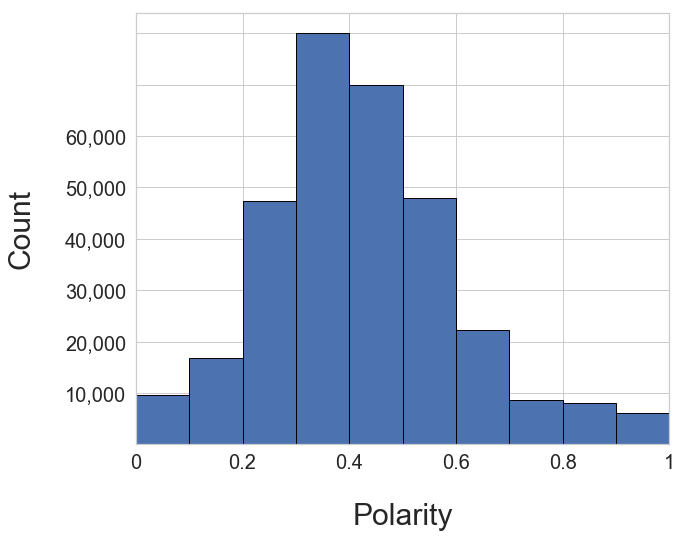

In [164]:
fig, ax = plt.subplots(figsize=(10,8))
plt.hist(df3['polarity'], bins=20, edgecolor='black', cumulative=False);
ax.set_xlim(0.0, 1.0)
ax.set_xlabel('Polarity', labelpad=30, fontsize=30)

ax.tick_params(axis='both', which='major', labelsize=20)
ax.tick_params(axis='both', which='minor', labelsize=20)

ax.set_yticklabels(['', '10,000', '20,000', '30,000', '40,000', '50,000', '60,000'])

ax.set_ylabel('Count', labelpad=30, fontsize=30)
ax.set_xticklabels([0, .2, .4, .6, .8, 1])
plt.tight_layout()

# plt.savefig('plots/walk_score_and_home_price.jpg')

In [12]:
df3.head(1)

,id_x,host_id,host_listings_count,host_total_listings_count,neighbourhood,zipcode,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,price,guests_included,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,reviews_per_month,listing_id,id_y,date,reviewer_id,reviewer_name,comments,reviews_cleaned_str,polarity,subjectivity,review_length,cleaned_comments,num_sentences,comment_words_only,individual_words,word_count,average_word_length,most_frequent_words,cluster_pred,lda_1,lda_2,lda_3,lda_4,lda_5,lda_6,lda_7,lda_8,lda_9,lda_10
0,7893,21489,1,1,Piedmont,97217,45.575479,-122.666777,House,Entire home/apt,3,1.0,2.0,2.0,Real Bed,"{TV,Wifi,Kitchen,""Free parking on premises"",""I...",175,1,2,100.0,10.0,10.0,10.0,10.0,10.0,10.0,0,0.02,7893,27282,2010-02-22,52074,Shaun,Couldn't possibly had a better experience with...,couldnt possibl better experi trip would give ...,0.275,0.65,158,couldnt possibly better experience trip would ...,3,couldnt possibly had a better experience with ...,"['couldnt', 'possibly', 'had', 'a', 'better', ...",29,4.241379,[],3,0.272123,0.594522,0.016668,0.016668,0.016672,0.01667,0.016672,0.016669,0.016668,0.016669


/Users/brenner/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:720: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/brenner/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:721: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


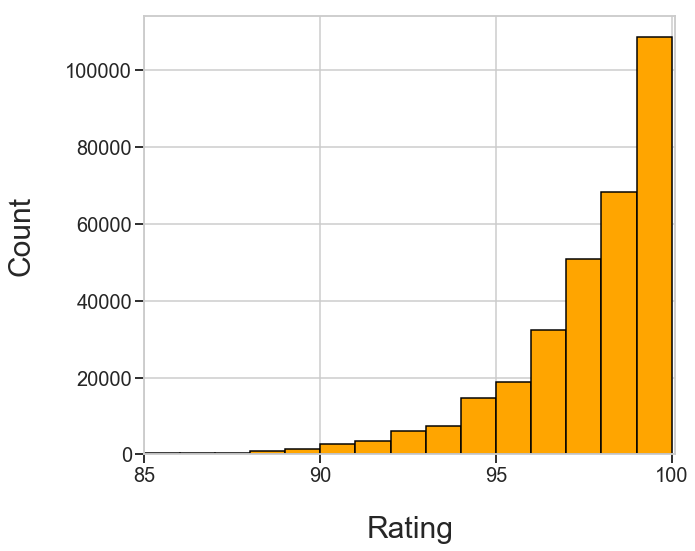

In [71]:
fig, ax = plt.subplots(figsize=(10,8))
plt.hist(df3['review_scores_rating'], range=(85,100), bins=15, color = 'orange', edgecolor='black')
# sns.countplot(df3['review_scores_rating'], ax=ax, color='green', edgecolor='black')
# ax.set_title('Ratings by Review')
ax.set_xlim(85, 100.1)
ax.set_xlabel('Rating', labelpad=30, fontsize=30)
ax.set_xticks(ticks=[85, 90, 95, 100])
# ax.set_xticklabels([0, 20, 40, 60, 80, 100])
# ax.set_xticklabels([0, .2, .4, .6, .8, 1])

ax.tick_params(axis='both', which='major', labelsize=20)
ax.tick_params(axis='both', which='minor', labelsize=20)

# ax.set_yticklabels(['', '10,000', '20,000', '30,000', '40,000', '50,000', '60,000'])

ax.set_ylabel('Count', labelpad=30, fontsize=30)

plt.tight_layout()

# plt.savefig('plots/walk_score_and_home_price.jpg')



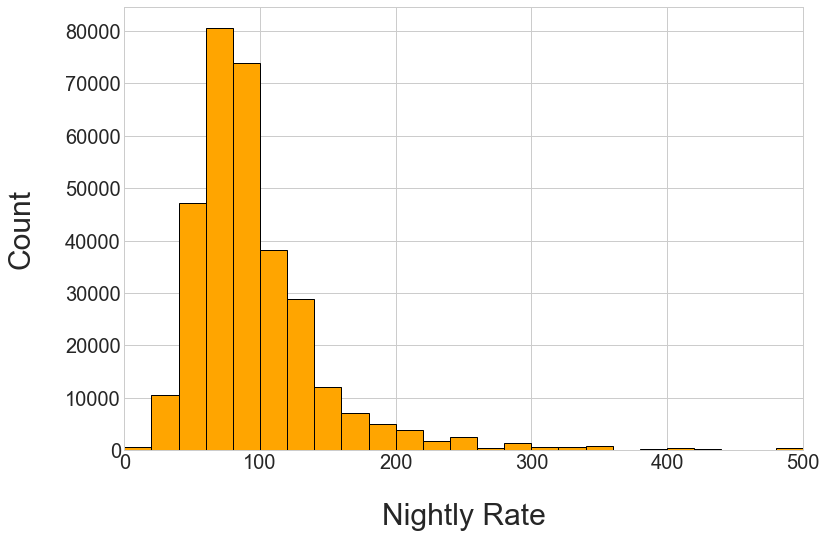

In [144]:
fig, ax = plt.subplots(figsize=(12,8))
plt.hist(x['price'], bins=25, color='orange', edgecolor='black')
# sns.countplot(df3['review_scores_rating'], ax=ax, color='green', edgecolor='black')
# ax.set_title('Ratings by Review')
ax.set_xlim(0,500)
ax.set_xlabel('Nightly Rate', labelpad=30, fontsize=30)
# ax.set_xticks(ticks=[85, 90, 95, 100])
# ax.set_xticklabels([0, 20, 40, 60, 80, 100])
# ax.set_xticklabels([0, .2, .4, .6, .8, 1])

ax.tick_params(axis='both', which='major', labelsize=20)
ax.tick_params(axis='both', which='minor', labelsize=20)

# ax.set_yticklabels(['', '10,000', '20,000', '30,000', '40,000', '50,000', '60,000'])

ax.set_ylabel('Count', labelpad=30, fontsize=30)

plt.tight_layout()

plt.savefig('plots/nightly_cost_histogram.jpg', dpi=300)

In [79]:
df3.head()

,id_x,host_id,host_listings_count,host_total_listings_count,neighbourhood,zipcode,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,price,guests_included,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,reviews_per_month,listing_id,id_y,date,reviewer_id,reviewer_name,comments,reviews_cleaned_str,polarity,subjectivity,review_length,cleaned_comments,num_sentences,comment_words_only,individual_words,word_count,average_word_length,most_frequent_words,cluster_pred,lda_1,lda_2,lda_3,lda_4,lda_5,lda_6,lda_7,lda_8,lda_9,lda_10
0,7893,21489,1,1,Piedmont,97217,45.575479,-122.666777,House,Entire home/apt,3,1.0,2.0,2.0,Real Bed,"{TV,Wifi,Kitchen,""Free parking on premises"",""I...",175,1,2,100.0,10.0,10.0,10.0,10.0,10.0,10.0,0,0.02,7893,27282,2010-02-22,52074,Shaun,Couldn't possibly had a better experience with...,couldnt possibl better experi trip would give ...,0.275000,0.650000,158,couldnt possibly better experience trip would ...,3,couldnt possibly had a better experience with ...,"['couldnt', 'possibly', 'had', 'a', 'better', ...",29,4.241379,[],3,0.272123,0.594522,0.016668,0.016668,0.016672,0.016670,0.016672,0.016669,0.016668,0.016669
1,7893,21489,1,1,Piedmont,97217,45.575479,-122.666777,House,Entire home/apt,3,1.0,2.0,2.0,Real Bed,"{TV,Wifi,Kitchen,""Free parking on premises"",""I...",175,1,2,100.0,10.0,10.0,10.0,10.0,10.0,10.0,0,0.02,7893,17461247,2014-08-12,13284006,Jessica,Jesse's place was really wonderful! The apartm...,jess place realli wonder apart locat block awa...,0.275463,0.601852,670,jesses place really wonderful apartment locate...,10,jesses place was really wonderful the apartmen...,"['jesses', 'place', 'was', 'really', 'wonderfu...",119,4.436975,"[('place', 2), ('really', 2), ('apartment', 2)]",7,0.002779,0.323845,0.002779,0.002778,0.194300,0.111495,0.002779,0.002778,0.002778,0.353690
2,12899,49682,1,1,Concordia,97211,45.564010,-122.634717,Guest suite,Private room,3,1.0,2.0,2.0,Real Bed,"{Internet,Wifi,""Air conditioning"",Kitchen,""Pet...",65,2,497,98.0,10.0,10.0,10.0,10.0,10.0,10.0,0,4.69,12899,24767,2010-01-24,69327,Stuart,"Recommended! Very good value for a spacious, a...",recommend good valu spaciou airi upper floor a...,0.370000,0.360000,112,recommended good value spacious airy upper flo...,3,recommended very good value for a spacious air...,"['recommended', 'very', 'good', 'value', 'for'...",19,4.736842,[],6,0.012503,0.012501,0.012501,0.012501,0.240606,0.474373,0.012501,0.012501,0.197512,0.012501
3,12899,49682,1,1,Concordia,97211,45.564010,-122.634717,Guest suite,Private room,3,1.0,2.0,2.0,Real Bed,"{Internet,Wifi,""Air conditioning"",Kitchen,""Pet...",65,2,497,98.0,10.0,10.0,10.0,10.0,10.0,10.0,0,4.69,12899,29230,2010-03-13,72846,John,Our ten days visiting in Portland were enormou...,day visit portland enorm enhanc alison david c...,0.266667,0.579167,281,days visiting portland enormously enhanced ali...,4,our ten days visiting in portland were enormou...,"['our', 'ten', 'days', 'visiting', 'in', 'port...",44,5.250000,"[('portland', 2)]",4,0.014288,0.014292,0.014290,0.014286,0.014296,0.014286,0.014287,0.871401,0.014288,0.014286
4,12899,49682,1,1,Concordia,97211,45.564010,-122.634717,Guest suite,Private room,3,1.0,2.0,2.0,Real Bed,"{Internet,Wifi,""Air conditioning"",Kitchen,""Pet...",65,2,497,98.0,10.0,10.0,10.0,10.0,10.0,10.0,0,4.69,12899,29806,2010-03-16,84196,Lois,We had a wonderful time staying in the area of...,wonder time stay area alberta artsth bed comfi...,0.408929,0.821429,317,wonderful time staying area alberta artsthe be...,4,we had a wonderful time staying in the area of...,"['we', 'had', 'a', 'wonderful', 'time', 'stayi...",57,4.350877,"[('great', 2)]",7,0.005557,0.189475,0.005557,0.005556,0.005558,0.005557,0.092100,0.005558,0.281088,0.403994


<Figure size 432x432 with 0 Axes>

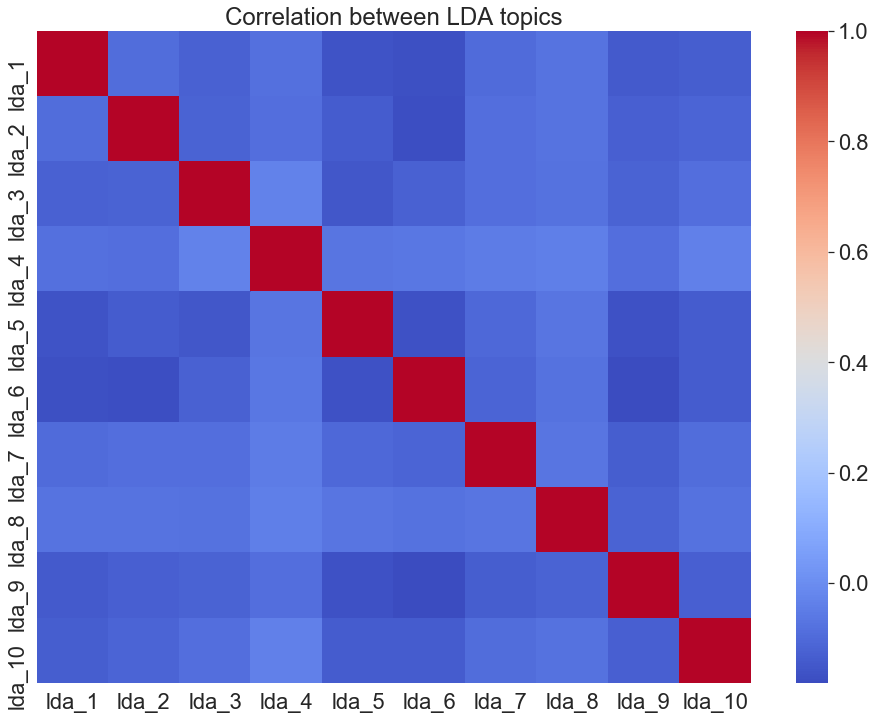

In [146]:
sns.set_context('talk')
sns.set(font_scale=2.0)
plt.figure(figsize=(6,6))
fig, ax = plt.subplots(figsize=(16,12))
sns.heatmap(df3[['lda_1',
       'lda_2', 'lda_3', 'lda_4', 'lda_5', 'lda_6', 'lda_7', 'lda_8', 'lda_9',
       'lda_10']].corr(), cmap='coolwarm')
ax.set_title('Correlation between LDA topics')
# plt.savefig('lda_topic_heatmap.jpg', dpi=300)
# plt.tight_layout()

In [92]:
df3.head()

,id_x,host_id,host_listings_count,host_total_listings_count,neighbourhood,zipcode,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,price,guests_included,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,reviews_per_month,listing_id,id_y,date,reviewer_id,reviewer_name,comments,reviews_cleaned_str,polarity,subjectivity,review_length,cleaned_comments,num_sentences,comment_words_only,individual_words,word_count,average_word_length,most_frequent_words,cluster_pred,lda_1,lda_2,lda_3,lda_4,lda_5,lda_6,lda_7,lda_8,lda_9,lda_10
0,7893,21489,1,1,Piedmont,97217,45.575479,-122.666777,House,Entire home/apt,3,1.0,2.0,2.0,Real Bed,"{TV,Wifi,Kitchen,""Free parking on premises"",""I...",175,1,2,100.0,10.0,10.0,10.0,10.0,10.0,10.0,0,0.02,7893,27282,2010-02-22,52074,Shaun,Couldn't possibly had a better experience with...,couldnt possibl better experi trip would give ...,0.275000,0.650000,158,couldnt possibly better experience trip would ...,3,couldnt possibly had a better experience with ...,"['couldnt', 'possibly', 'had', 'a', 'better', ...",29,4.241379,[],3,0.272123,0.594522,0.016668,0.016668,0.016672,0.016670,0.016672,0.016669,0.016668,0.016669
1,7893,21489,1,1,Piedmont,97217,45.575479,-122.666777,House,Entire home/apt,3,1.0,2.0,2.0,Real Bed,"{TV,Wifi,Kitchen,""Free parking on premises"",""I...",175,1,2,100.0,10.0,10.0,10.0,10.0,10.0,10.0,0,0.02,7893,17461247,2014-08-12,13284006,Jessica,Jesse's place was really wonderful! The apartm...,jess place realli wonder apart locat block awa...,0.275463,0.601852,670,jesses place really wonderful apartment locate...,10,jesses place was really wonderful the apartmen...,"['jesses', 'place', 'was', 'really', 'wonderfu...",119,4.436975,"[('place', 2), ('really', 2), ('apartment', 2)]",7,0.002779,0.323845,0.002779,0.002778,0.194300,0.111495,0.002779,0.002778,0.002778,0.353690
2,12899,49682,1,1,Concordia,97211,45.564010,-122.634717,Guest suite,Private room,3,1.0,2.0,2.0,Real Bed,"{Internet,Wifi,""Air conditioning"",Kitchen,""Pet...",65,2,497,98.0,10.0,10.0,10.0,10.0,10.0,10.0,0,4.69,12899,24767,2010-01-24,69327,Stuart,"Recommended! Very good value for a spacious, a...",recommend good valu spaciou airi upper floor a...,0.370000,0.360000,112,recommended good value spacious airy upper flo...,3,recommended very good value for a spacious air...,"['recommended', 'very', 'good', 'value', 'for'...",19,4.736842,[],6,0.012503,0.012501,0.012501,0.012501,0.240606,0.474373,0.012501,0.012501,0.197512,0.012501
3,12899,49682,1,1,Concordia,97211,45.564010,-122.634717,Guest suite,Private room,3,1.0,2.0,2.0,Real Bed,"{Internet,Wifi,""Air conditioning"",Kitchen,""Pet...",65,2,497,98.0,10.0,10.0,10.0,10.0,10.0,10.0,0,4.69,12899,29230,2010-03-13,72846,John,Our ten days visiting in Portland were enormou...,day visit portland enorm enhanc alison david c...,0.266667,0.579167,281,days visiting portland enormously enhanced ali...,4,our ten days visiting in portland were enormou...,"['our', 'ten', 'days', 'visiting', 'in', 'port...",44,5.250000,"[('portland', 2)]",4,0.014288,0.014292,0.014290,0.014286,0.014296,0.014286,0.014287,0.871401,0.014288,0.014286
4,12899,49682,1,1,Concordia,97211,45.564010,-122.634717,Guest suite,Private room,3,1.0,2.0,2.0,Real Bed,"{Internet,Wifi,""Air conditioning"",Kitchen,""Pet...",65,2,497,98.0,10.0,10.0,10.0,10.0,10.0,10.0,0,4.69,12899,29806,2010-03-16,84196,Lois,We had a wonderful time staying in the area of...,wonder time stay area alberta artsth bed comfi...,0.408929,0.821429,317,wonderful time staying area alberta artsthe be...,4,we had a wonderful time staying in the area of...,"['we', 'had', 'a', 'wonderful', 'time', 'stayi...",57,4.350877,"[('great', 2)]",7,0.005557,0.189475,0.005557,0.005556,0.005558,0.005557,0.092100,0.005558,0.281088,0.403994


In [122]:
import pprint

In [127]:
df3[1000:].groupby('cluster_pred')[['cluster_pred', 'comments']].tail(3).values

array([[7,
        'Although short, we thoroughly enjoyed our stay. The apartment was clean & members of our party particularly enjoyed how comfortable the beds were. Also great location!'],
       [4, 'Great place.'],
       [7,
        'This house is classic PDX, and was very comfortable and homey for our 3-night stay. Nice design, great kitchen and entertaining amenities (like a blender and phone-ready stereo) Everything was really clean, and Amber was a great host, accommodating our special request which made our trip so much less stressful. The coffeeshop on stark has great pie, coffee and hard cider. We enjoyed a great walk up and down nearby Mt Tabor. Would totally stay here again.'],
       [2,
        'I stayed for work and was looking for privacy and not a shared bathroom and found a terrific home. Elie was very hospitable and provided an ironing board to use. His place is popular but I’ll stay again if available.'],
       [2,
        'This is a relatively spacious, private 

In [105]:
df3.shape

(318262, 56)

In [106]:
df3['listing_id'].nunique()

4911

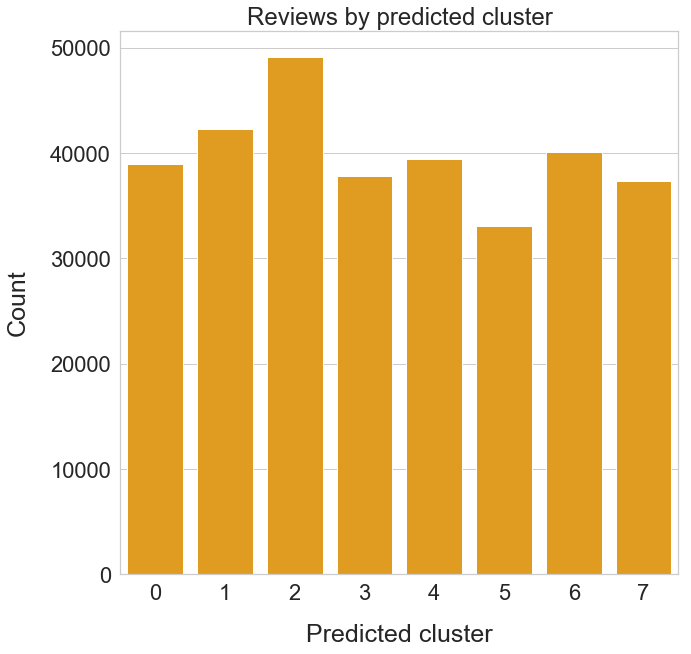

In [157]:
sns.set_style('whitegrid')
fig, ax = plt.subplots(figsize=(10,10))
sns.countplot(df3['cluster_pred'], color='orange', ax=ax)
ax.set_title('Reviews by predicted cluster')
ax.set_xlabel('Predicted cluster', labelpad=20, fontsize=25)
ax.set_ylabel('Count',labelpad=20, fontsize=25)
plt.savefig('plots/reviews_by_cluster.jpg', dpi=300)

In [131]:
df3.groupby('cluster_pred')[['polarity', 'subjectivity',
       'review_length', 'cleaned_comments', 'num_sentences',
       'comment_words_only', 'individual_words', 'word_count',
       'average_word_length', 'cluster_pred', 'lda_1',
       'lda_2', 'lda_3', 'lda_4', 'lda_5', 'lda_6', 'lda_7', 'lda_8', 'lda_9',
       'lda_10']].mean()

,polarity,subjectivity,review_length,num_sentences,word_count,average_word_length,cluster_pred,lda_1,lda_2,lda_3,lda_4,lda_5,lda_6,lda_7,lda_8,lda_9,lda_10
cluster_pred,,,,,,,,,,,,,,,,,
0,0.440689,0.638884,314.496165,4.647323,57.151210,4.414957,0.0,0.517161,0.059919,0.051656,0.034378,0.061778,0.063115,0.051448,0.054682,0.059742,0.046121
1,0.473774,0.688483,199.775064,3.522777,34.958535,4.692053,1.0,0.053082,0.052185,0.041862,0.039701,0.541087,0.068706,0.047649,0.058185,0.055604,0.041939
2,0.337065,0.608635,462.446489,6.071456,84.010777,4.400512,2.0,0.062016,0.056905,0.058641,0.032985,0.065904,0.062886,0.045277,0.038625,0.526229,0.050532
3,0.424346,0.643549,358.339117,4.989024,65.137159,4.389457,3.0,0.073568,0.489783,0.051078,0.030815,0.068617,0.059975,0.054635,0.052573,0.069869,0.049088
4,0.385100,0.581711,241.938309,3.760938,43.116212,4.384279,4.0,0.064315,0.060347,0.057555,0.091046,0.078386,0.080305,0.330418,0.125043,0.061118,0.051468
5,0.357570,0.590690,288.037677,4.236370,51.497415,4.534450,5.0,0.057452,0.054294,0.474306,0.047715,0.064709,0.079418,0.052349,0.051973,0.063502,0.054282
6,0.535920,0.703157,146.560133,2.964040,25.614509,4.747692,6.0,0.047665,0.040221,0.046003,0.038263,0.058672,0.580715,0.046920,0.051280,0.049867,0.040394
7,0.421458,0.641912,308.155472,4.547488,54.374869,4.589028,7.0,0.054451,0.057304,0.060823,0.044857,0.069047,0.072619,0.052152,0.050538,0.066106,0.472103
